In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

In [2]:
from src.clean_data import clean_data

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
import pickle


In [5]:
def plot_roc_curve(ax, fpr, tpr, auc, label=None):
    ax.plot(fpr, tpr, linewidth=2, label=label)
    ax.plot([0,1], [0,1], 'k--')
    ax.set_title(f'{label} ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate (Recall)')
    ax.legend(["AUC=%.3f"%auc], fontsize=12)

In [9]:
df = pd.read_json('data/data.json')

In [10]:
df = clean_data(df)

In [11]:
df

,fraud,delivery_method,fb_published,ticket_type_length,gross_profits_dummie,channels,user_type,sale_duration2
0,True,0.0,0,False,0,5,1,33
1,False,1.0,0,False,3,0,3,28
2,False,1.0,0,False,4,8,3,54
3,False,1.0,0,False,3,6,3,0
4,False,0.0,1,False,4,11,3,63
...,...,...,...,...,...,...,...,...
14332,True,0.0,0,False,0,0,1,11
14333,False,1.0,0,False,4,5,4,55
14334,False,0.0,1,False,1,13,4,89
14335,False,0.0,0,False,0,8,3,6


In [40]:
df.isna()

fraud                   14337
delivery_method         14337
fb_published            14337
ticket_type_length      14337
gross_profits_dummie    14337
channels                14337
user_type               14337
sale_duration2          14337
dtype: int64

In [12]:
X = np.array(df.drop(columns='fraud').copy())
y = np.array(df['fraud'].copy())

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression

In [22]:
kfold = KFold(n_splits=10)
accuracies = []
precisions = []
recalls = []

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs", max_iter = 1000)
    model.fit(X_train[train_index], y_train[train_index])
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

In [23]:
print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.9521027059738912
Precision: 0.8632830703259652
Recall: 0.5502455661428127


In [16]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_true = y_test
probabilities = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_true, y_predict))
print("Precision:", precision_score(y_true, y_predict))
print("Recall:", recall_score(y_true, y_predict))

Accuracy: 0.9536959553695955
Precision: 0.8878923766816144
Recall: 0.584070796460177


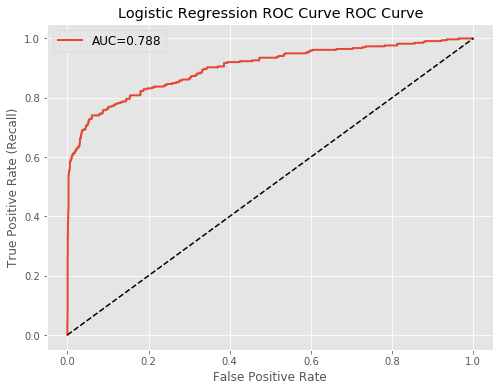

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities)
fig, ax = plt.subplots(figsize=(8,6))
auc_score = metrics.roc_auc_score(y_test, y_predict)
plot_roc_curve(ax, fpr, tpr, auc_score,'Logistic Regression ROC Curve')
plt.savefig('images/logistic_reg_roc_curve.png')

## Gradient Boosting

In [53]:
kfold = KFold(n_splits=5)
accuracies = []
precisions = []
recalls = []

for train_index, test_index in kfold.split(X_train):
#     model = GradientBoostingClassifier(learning_rate=0.5,
#                                    n_estimators=500,
#                                    min_samples_leaf=5,
#                                    max_depth=3,
#                                    subsample=0.5)
    model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1)
    model.fit(X_train[train_index], y_train[train_index])
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))
print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.9687509325030004
Precision: 0.846479285473699
Recall: 0.7988279257891497


In [18]:
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_true = y_test
probabilities = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_true, y_predict))
print("Precision:", precision_score(y_true, y_predict))
print("Recall:", recall_score(y_true, y_predict))

Accuracy: 0.9673640167364017
Precision: 0.8675496688741722
Recall: 0.7728613569321534


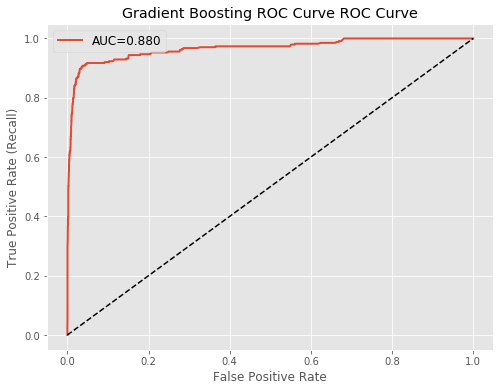

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities)
fig, ax = plt.subplots(figsize=(8,6))
auc_score = metrics.roc_auc_score(y_test, y_predict)
plot_roc_curve(ax, fpr, tpr, auc_score,'Gradient Boosting ROC Curve')
plt.savefig('images/gradient_boost_roc_curve.png')

In [26]:
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
pickle.dump(model, open('models/grad_boost_model.p', 'wb'))

In [23]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = df.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)

In [24]:
feature_importances

,importance
gross_profits_dummie,0.717969
sale_duration2,0.102498
user_type,0.100074
delivery_method,0.038278
channels,0.030626
ticket_type_length,0.009201
fb_published,0.001354


In [25]:
from pymongo import MongoClient

In [41]:
model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
probs = model.predict_proba(X)[:, 1]

In [43]:
probs

array([0.77749434, 0.00519622, 0.00322824, ..., 0.0047932 , 0.38127442,
       0.94633479])

In [44]:
df

,fraud,delivery_method,fb_published,ticket_type_length,gross_profits_dummie,channels,user_type,sale_duration2
0,True,0.0,0,False,0,5,1,33
1,False,1.0,0,False,3,0,3,28
2,False,1.0,0,False,4,8,3,54
3,False,1.0,0,False,3,6,3,0
4,False,0.0,1,False,4,11,3,63
...,...,...,...,...,...,...,...,...
14332,True,0.0,0,False,0,0,1,11
14333,False,1.0,0,False,4,5,4,55
14334,False,0.0,1,False,1,13,4,89
14335,False,0.0,0,False,0,8,3,6


In [32]:
df_full = pd.read_json('data/data.json')

In [33]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [35]:
df_full.drop(columns='acct_type', inplace=True)

In [58]:
#df_full

In [54]:
df_full['fraud_probability'] = df['fraud'].astype('int')

In [57]:
df_full.to_csv('data/train_with_probs.csv', index=False)

In [6]:
df_full = pd.read_csv('data/train_with_probs.csv')

In [11]:
df_sample = df_full.iloc[0:1, :]

In [12]:
df_sample

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud_probability
0,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1


In [22]:
from pymongo import MongoClient
import json

In [29]:
test = json.loads(df_sample.T.to_json()).values()

In [30]:
test

dict_values([{'approx_payout_date': 1266062400, 'body_length': 3852, 'channels': 5, 'country': 'US', 'currency': 'USD', 'delivery_method': 0.0, 'description': '<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3">

In [31]:
client = MongoClient('localhost', 27017)
db = client['fraudulent']
table = db['events__']

In [33]:
table.insert_many(test)

In [ ]:
db.collection.insert_many(df.to_dict('records'))